In [2]:
import os
import sys

sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy.io import wavfile
from pylab import*
import IPython
# from pymir import *

In [3]:
orig_df = pd.read_hdf("../../data_extract/features_dataset_2b.h5")
from pymir import *

In [4]:
mfcc_list = ["mfcc{}".format(i) for i in range(14)]
chroma_list = ["chroma{}".format(i) for i in range(12)]

In [5]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

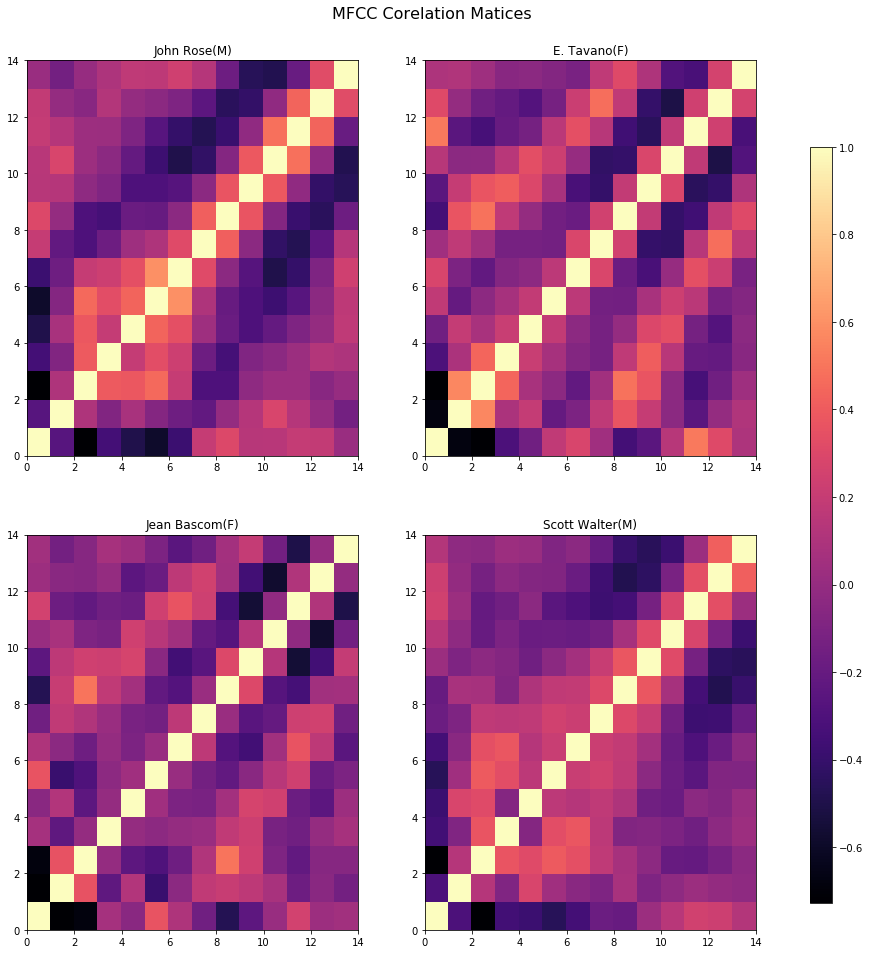

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

def get_person_info(df, pid):
    row = orig_df[orig_df['id']==pid].iloc[1]
    info = str(row['pname']) + "(" + str(row['pgender']) + ")"
    return info

for i,pid in enumerate([0,1,32,33]):
    R = corrcoef(orig_df[orig_df['id']==pid][mfcc_list],rowvar = 0)
    axobj = axes.flat[i]
    plot1 = axobj.pcolormesh(R,cmap='magma');
    _ = axobj.set_title(get_person_info(orig_df,pid));
#     _ = axobj.set_yticks(arange(0.5,14.5),range(0,14));
#     _ = axobj.set_xticks(arange(0.5,14.5),range(0,14));

# fig.subplots_adjust(hspace=0.3);
fig.subplots_adjust(right=0.8);
fig.suptitle("MFCC Corelation Matices",fontsize = 16)
# fig.tight_layout()
fig.subplots_adjust(top=0.93)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7]);
fig.colorbar(plot1, cax=cbar_ax);

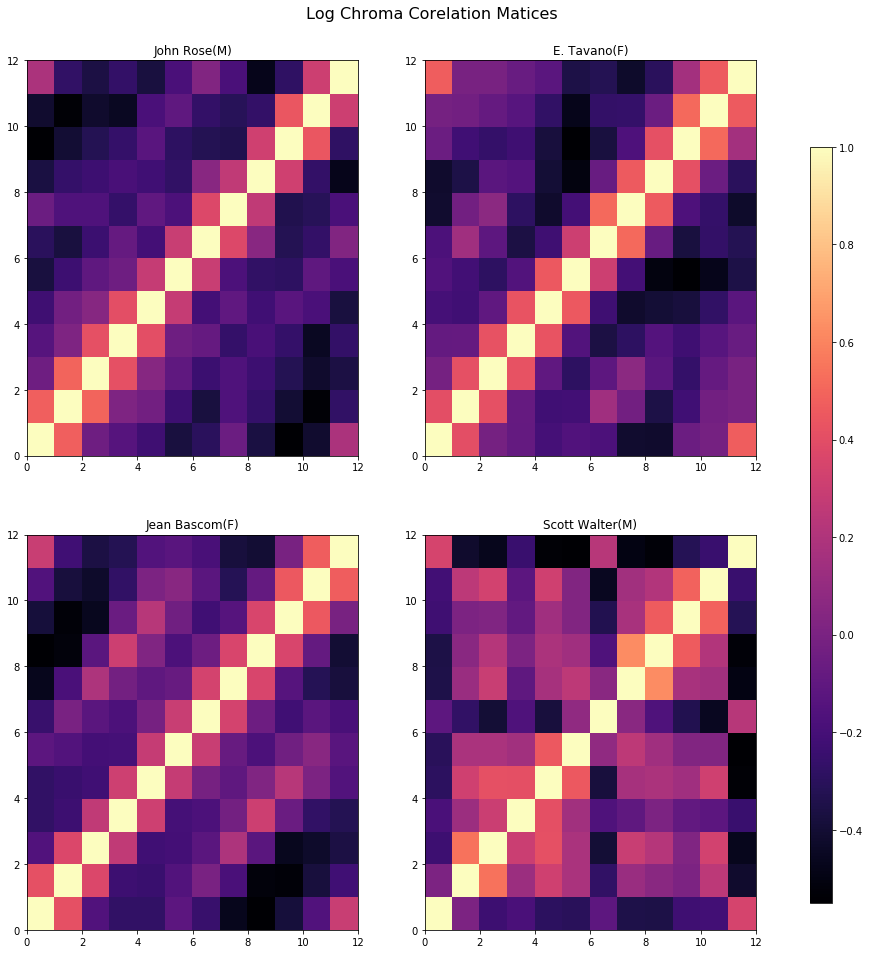

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

def get_person_info(df, pid):
    row = orig_df[orig_df['id']==pid].iloc[1]
    info = str(row['pname']) + "(" + str(row['pgender']) + ")"
    return info

for i,pid in enumerate([0,1,32,33]):
    R = corrcoef(np.log(orig_df[orig_df['id']==pid][chroma_list]),rowvar = 0)
    axobj = axes.flat[i]
    plot1 = axobj.pcolormesh(R,cmap='magma');
    _ = axobj.set_title(get_person_info(orig_df,pid));
#     _ = axobj.set_yticks(arange(0.5,14.5),range(0,14));
#     _ = axobj.set_xticks(arange(0.5,14.5),range(0,14));

# fig.subplots_adjust(hspace=0.3);
fig.subplots_adjust(right=0.8);
fig.suptitle("Log Chroma Corelation Matices",fontsize = 16)
# fig.tight_layout()
fig.subplots_adjust(top=0.93)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7]);
fig.colorbar(plot1, cax=cbar_ax);

In [180]:
def get_file_path(df, p_id, f_num):
    df_pi = df[df['id']==p_id]
    fname = df_pi.sort_values('fname').fname.unique()[f_num]
    chname = df_pi[df_pi['fname']==fname]['chname'].iloc[0]
    pid = df_pi[df_pi['fname']==fname]['pid'].iloc[0]
    return "../../data/dev-clean/"+pid+"/"+chname+"/"+fname

In [181]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [182]:
y, sr = librosa.load(get_file_path(orig_df, 0, 1))

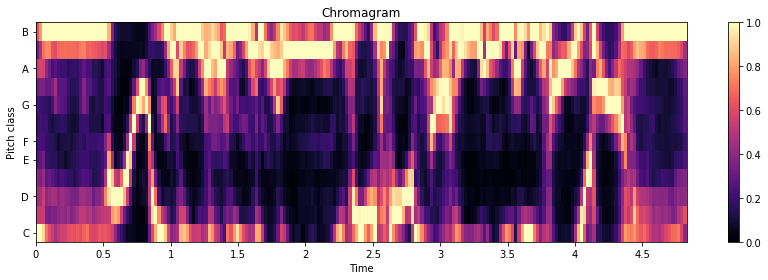

In [183]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
y_harmonic, y_percussive = librosa.effects.hpss(y)
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4));

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', cmap='magma', vmin=0, vmax=1);

plt.title('Chromagram');
plt.colorbar();

plt.tight_layout();